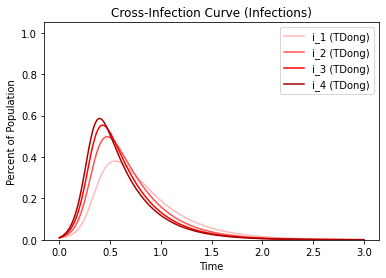

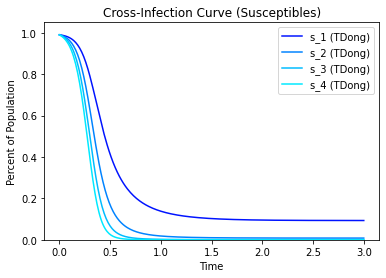

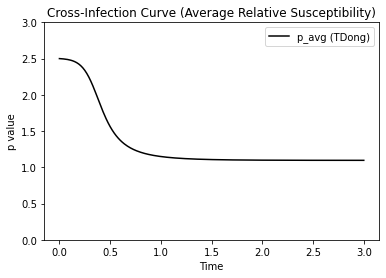


From this analysis, it appears that pop. 4 experienced the most infections and pop.1 experienced the least infections. This result makes sense given the contact matrix derived from a population susceptibilities where pop. 4 has the highest p value.
In general for all cases, infection spreads and subdues after t = 0.5 once the entire populations including all 4 groups are no less susceptible as infected people recover.
Particularly, pop 1 and 2 retains some still susceptible. The infection died out amongst all 4 groups as the number of susceptibles decreased and the NGM evolve in such a way that R0 is less than 1.
P_avg was found to be 2.5 at t = 0, which makes sense since all 4 groups have equal population and this is the average of 1,2,3,4. At diease free equilibrium, p averages out to around 1.25 as the proportions of infected that can spread infection to other susceptibles decreases.

From the perspective of COVID-19, it would actually make sense to take actions such as that of Swe

In [66]:
import numpy as np
import matplotlib.pyplot as plt

Ds_0 = np.matrix([[0.99,0,0,0],[0,0.99,0,0],[0,0,0.99,0],[0,0,0,0.99]])
i_0 = np.matrix([[0.01],[0.01],[0.01],[0.01]])
t0 = 0
t = 3 #days
dt = 0.01
C =  np.matrix([[0.45,0.45,0.45,0.45],[0.45,0.45,0.45,0.45],[0.45,0.45,0.45,0.45],[0.45,0.45,0.45,0.45]])
Dp = np.matrix([[1,0,0,0],[0,2,0,0],[0,0,3,0],[0,0,0,4]])
Dw = np.matrix([[0.25,0,0,0],[0,0.25,0,0],[0,0,0.25,0],[0,0,0,0.25]])
Dg = np.matrix([[3,0,0,0],[0,3,0,0],[0,0,3,0],[0,0,0,3]])

def dsdt(Ds, Dp, Dw, Dg, i):
    return -1*(Ds*Dp*C*np.linalg.inv(Dw))*i.reshape((4,1))

def didt(Ds, Dp, Dw, Dg, i):
    return (Ds*Dp*C*np.linalg.inv(Dw))*i.reshape((4,1))-Dg*i.reshape((4,1))

def FEM(t0, t, dt, Ds, Dp, Dw, Dg, i):
    steps = int((t-t0)/dt)+1
    t_mat = np.matrix([np.linspace(t0, t, steps),np.linspace(t0, t, steps),np.linspace(t0, t, steps),np.linspace(t0, t, steps)])
    s_mat = np.matrix(np.zeros((4,steps)))
    i_mat = np.matrix(np.zeros((4,steps)))
    s_mat[0,0] = Ds[0,0]
    s_mat[1,0] = Ds[1,1]
    s_mat[2,0] = Ds[2,2]
    s_mat[3,0] = Ds[3,3]
    i_mat[0,0] = i[0,0]
    i_mat[1,0] = i[1,0]
    i_mat[2,0] = i[2,0]
    i_mat[3,0] = i[3,0]
    for j in range(1, steps):
        t = np.zeros(4)
        s = np.zeros(4)
        i = np.zeros(4)
        t[0] = t_mat[0,j-1]
        t[1] = t_mat[1,j-1]
        t[2] = t_mat[2,j-1]
        t[3] = t_mat[3,j-1]
        s[0] = s_mat[0,j-1]
        s[1] = s_mat[1,j-1]
        s[2] = s_mat[2,j-1]
        s[3] = s_mat[3,j-1]
        i[0] = i_mat[0,j-1]
        i[1] = i_mat[1,j-1]
        i[2] = i_mat[2,j-1]
        i[3] = i_mat[3,j-1]
        s_mat[0,j] = s[0] + dsdt(Ds, Dp, Dw, Dg, i)[0]*dt
        s_mat[1,j] = s[1] + dsdt(Ds, Dp, Dw, Dg, i)[1]*dt
        s_mat[2,j] = s[2] + dsdt(Ds, Dp, Dw, Dg, i)[2]*dt
        s_mat[3,j] = s[3] + dsdt(Ds, Dp, Dw, Dg, i)[3]*dt
        i_mat[0,j] = i[0] + didt(Ds, Dp, Dw, Dg, i)[0]*dt
        i_mat[1,j] = i[1] + didt(Ds, Dp, Dw, Dg, i)[1]*dt
        i_mat[2,j] = i[2] + didt(Ds, Dp, Dw, Dg, i)[2]*dt
        i_mat[3,j] = i[3] + didt(Ds, Dp, Dw, Dg, i)[3]*dt
        Ds = np.matrix([[s_mat[0,j],0,0,0],[0,s_mat[1,j],0,0],[0,0,s_mat[2,j],0],[0,0,0,s_mat[3,j]]])
        i = np.matrix([i_mat[0,j],i_mat[0,j],i_mat[0,j],i_mat[0,j]])
        
    return t_mat, s_mat, i_mat


t_sim, s_sim, i_sim = FEM(t0, t, dt, Ds_0, Dp, Dw, Dg, i_0)
plt.plot(np.array(t_sim[0].transpose()), np.array(i_sim[0].transpose()), label='i_1 (TDong)', color = '#ffbaba')
plt.plot(np.array(t_sim[1].transpose()), np.array(i_sim[1].transpose()), label='i_2 (TDong)', color = '#ff5252')
plt.plot(np.array(t_sim[2].transpose()), np.array(i_sim[2].transpose()), label='i_3 (TDong)', color = '#ff0000')
plt.plot(np.array(t_sim[3].transpose()), np.array(i_sim[3].transpose()), label='i_4 (TDong)', color = '#a70000')
plt.xlabel('Time')
plt.ylabel('Percent of Population')
plt.title("Cross-Infection Curve (Infections)")
plt.ylim([0,1.05])
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()
plt.plot(np.array(t_sim[0].transpose()), np.array(s_sim[0].transpose()), label='s_1 (TDong)', color = '#0013ff')
plt.plot(np.array(t_sim[1].transpose()), np.array(s_sim[1].transpose()), label='s_2 (TDong)', color = '#0083ff')
plt.plot(np.array(t_sim[2].transpose()), np.array(s_sim[2].transpose()), label='s_3 (TDong)', color = '#00bcff')
plt.plot(np.array(t_sim[3].transpose()), np.array(s_sim[3].transpose()), label='s_4 (TDong)', color = '#00e9ff')
plt.xlabel('Time')
plt.ylabel('Percent of Population')
plt.title("Cross-Infection Curve (Susceptibles)")
plt.ylim([0,1.05])
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

p = np.matrix([1,2,3,4])
p_avg = np.sum(p*s_sim,axis=0)/np.sum(s_sim,axis=0)
plt.plot(np.array(t_sim[0].transpose()), np.array(p_avg.transpose()), label='p_avg (TDong)', color = 'black')
plt.xlabel('Time')
plt.ylabel('p value')
plt.title("Cross-Infection Curve (Average Relative Susceptibility)")
plt.ylim([0,3])
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

print("\nFrom this analysis, it appears that pop. 4 experienced the most infections and pop.1 experienced the least infections. This result makes sense given the contact matrix derived from a population susceptibilities where pop. 4 has the highest p value.")
print("In general for all cases, infection spreads and subdues after t = 0.5 once the entire populations including all 4 groups are no less susceptible as infected people recover.")
print("Particularly, pop 1 and 2 retains some still susceptible. The infection died out amongst all 4 groups as the number of susceptibles decreased and the NGM evolve in such a way that R0 is less than 1.")
print("P_avg was found to be 2.5 at t = 0, which makes sense since all 4 groups have equal population and this is the average of 1,2,3,4. At diease free equilibrium, p averages out to around 1.25 as the proportions of infected that can spread infection to other susceptibles decreases.")


print("\nFrom the perspective of COVID-19, it would actually make sense to take actions such as that of Sweden, in which they isolated vulnerable/high susceptibility population while allowing more social interactions between less susceptible groups.")
print("In other words, infections within groups with lower susceptibility can be managed simply by isolating those groups and preventing their contact with those that has higher within-group contacts/high p value.")

In [32]:
from scipy.stats import nbinom
import numpy as np

def get_q(R0, k, G, mc_attempts):
    mean = R0
    variance = mean+(mean**2)/k
    p = mean/variance
    n = mean**2/(variance-mean)
    q_list = []
    for i in range(1, mc_attempts):
        count_single_transmission_death = 0
        additional_infections = 0
        for j in range(1, G):
            if j == 1:
                draw = nbinom.rvs(n=n,p=p,size=1)
                if draw == 0:
                    count_single_transmission_death += 1
                    additional_infections = 0
                    break
                if draw != 0:
                    additional_infections += draw
                    size_next = draw
            else:
                draw = nbinom.rvs(n=n,p=p,size=size_next)
                count_single_transmission_death += draw.size - np.count_nonzero(draw)
                additional_infections += np.sum(draw)
                size_next = np.sum(draw)
        q = float(count_single_transmission_death/(additional_infections+count_single_transmission_death))
        q_list.append(q)
    q_avg = np.average(q_list)
    return q_avg

k = [0.1, 0.5, 1.0, 5.0, 10.0] # Dispersion Parameter k
R0 = 3 # Mean R0
for k in k:
    q = get_q(R0, k, 10, 100000)
    print("k = " + str(round(k,3)) + ": " + str(round(q,3)))
    
    
print("When k is lower, the chance of a single transmission dying out (q) is higher. In other words, the probability that transmission never ceases (q) is lower when k is lower. In terms of superspreading from which k is low, this means that though an event of superspreading causes instances of significant secondary infections, it is likely to not sustain and die out quickly under the context of comparable k value.")

k = 0.1: 0.802
k = 0.5: 0.489
k = 1.0: 0.341
k = 5.0: 0.134
k = 10.0: 0.101
When k is lower, the chance of a single transmission dying out (q) is higher. In other words, the probability that transmission never ceases (q) is lower when k is lower. In terms of superspreading from which k is low, this means that though an event of superspreading causes instances of significant secondary infections, it is likely to not sustain and die out quickly under the context of comparable k value.
